# แบบฝึกหัดเขียนโปรแกรมครั้งที่ 2

## 2. หาค่าความเอนเอียงและความแปรปรวนด้วย analytical method และ simulation 
1. แบบจำลองค่าคงที่ 
2. แบบจำลองเชิงเส้นและ 
3. แบบจำลองเชิงเส้นผ่านจุดกำเนิด *

2.1 เมื่อกำหนดให้ฟังก์ชันเป้าหมายคือ $sin(\pi x)$ และสุ่มข้อมูลด้วยการแจกแจงแบบเอกรูปออกมา 2 ตัวอย่างในช่วง [-1,1] (Lecture หน้า 18)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import random

def normal_equation(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)



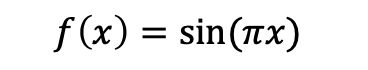

In [34]:
def sin_pi(x):
    return np.sin(np.dot(np.pi, x))

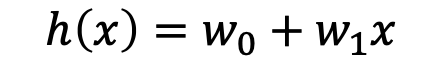

In [35]:

def hypothesis(x,w):
    return w[0] + w[1] * x

In [36]:
data_x_sin = np.linspace(-1, 1, 100)
data_func_x = sin_pi(data_x_sin) # f(x) function sin*pi
w0 = []
w1 = []
n = 100000 # จำนวน random


สุ่ม ข้อมูล 2 จุด จาก $𝑓(𝑥) = sin(𝜋𝑥)$ และ เก็บ Model $G^{(D)}(x)$

In [37]:
for i in range(n):
    sam_x = np.array(random.choices(data_x_sin, k=2))
    sam_y = sin_pi(sam_x)
    X_b = np.c_[np.zeros((sam_x.shape[0], 1)), sam_x]
    theta_normal = normal_equation(X_b, sam_y)
    w0.append(theta_normal[0])
    w1.append(theta_normal[1])

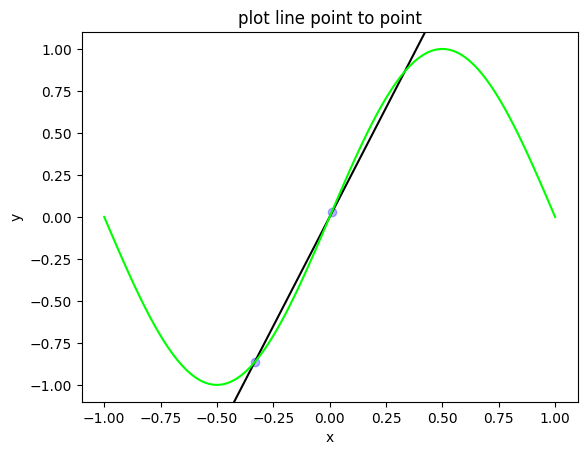

In [38]:
plt.scatter(sam_x, sam_y, color = "blue", marker='o', alpha=0.3) # plot point data

line_x = np.linspace(-1, 1, 100)
line_y = hypothesis(line_x,theta_normal)
plt.plot(line_x, line_y, color = 'black', alpha=1) # plot line ตัดจุด data

plt.plot(data_x_sin, data_func_x, color = "#00FF00") # plot f(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title('plot line point to point')
plt.axis([-1.1, 1.1, -1.1,  1.1])
plt.show()

mean theta = 1.400015366621563


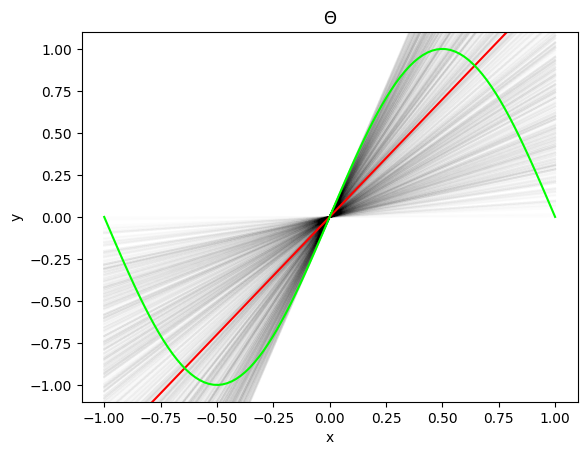

In [39]:
# mean g(x) 
mean_w0 = np.mean(w0)
mean_w1 = np.mean(w1)
print(f"mean theta = {mean_w1}")

for i in range(1000):
    theta = [w0[i], w1[i]]
    line_y = hypothesis(line_x,theta)
    plt.plot(line_x, line_y, color = 'black', alpha=0.01) # plot line each g(x) 

mean_thata_g = [mean_w0, mean_w1]
sample_x = np.linspace(-1, 1, 100)
func_g = hypothesis(sample_x,mean_thata_g)
plt.plot(sample_x, func_g, color = 'r', alpha=1)  # plot mean g(x) 

plt.plot(data_x_sin, data_func_x, color = "#00FF00") # plot f(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title("${\Theta}$")
plt.axis([-1.1, 1.1, -1.1,  1.1])
plt.show()

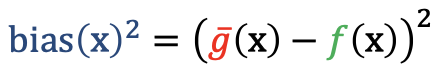
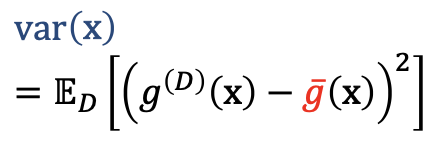
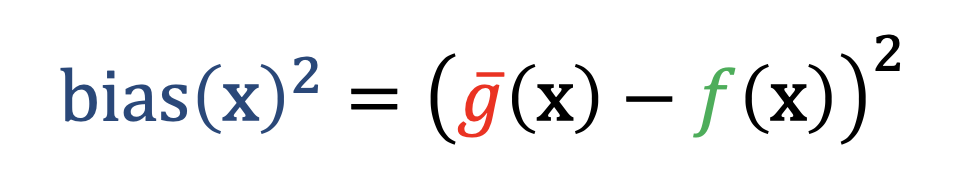
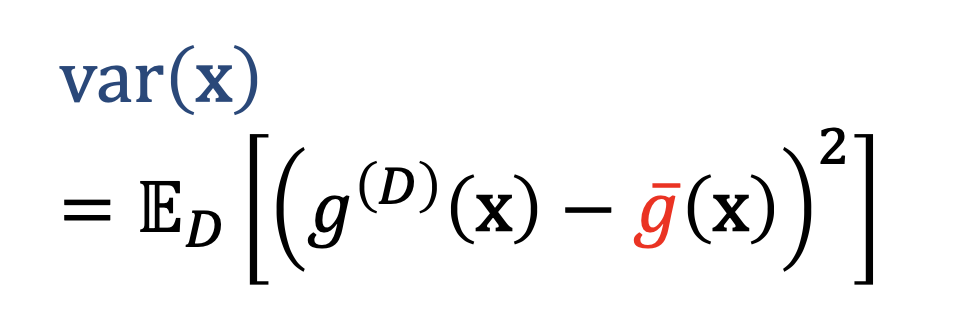

In [40]:
var = []
mean_fg = hypothesis(line_x,mean_thata_g)
for i in range(n):
    theta = [w0[i], w1[i]]
    func_dg = hypothesis(line_x,theta)
    var.append((func_dg-mean_fg)**2)
variance = np.mean(var)
print(f"variance = {variance:.2f}")

bias =  np.mean((func_g - data_func_x)**2)
print(f"bias = {bias:.2f}")

Bias_Variance = bias + variance
print(f"Bias-Variance = {Bias_Variance:.2f}")

variance = 0.25
bias = 0.28
Bias-Variance = 0.53
